In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshithapathakunta","key":"e9e931b9ff7e8f81b644ac7727b116c3"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d elikplim/car-evaluation-data-set

Dataset URL: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set
License(s): CC0-1.0
  0% 0.00/4.66k [00:00<?, ?B/s]
100% 4.66k/4.66k [00:00<00:00, 16.1MB/s]


In [12]:
!unzip -o car-evaluation-data-set.zip -d car_eval
!ls -lah car_eval

Archive:  car-evaluation-data-set.zip
  inflating: car_eval/car_evaluation.csv  
total 64K
drwxr-xr-x 2 root root 4.0K Aug 23 05:43 .
drwxr-xr-x 1 root root 4.0K Aug 23 05:43 ..
-rw-r--r-- 1 root root  53K Sep 21  2019 car_evaluation.csv


In [13]:
import pandas as pd
import glob, os
csvs = glob.glob("car_eval/*.csv")
if not csvs:
    data_files = glob.glob("car_eval/*.data")
    if data_files:
        columns = ["buying","maint","doors","persons","lug_boot","safety","class"]
        df = pd.read_csv(data_files[0], names=columns)
    else:
        raise FileNotFoundError("No CSV or DATA file found in car_eval/")
else:
    df = pd.read_csv(csvs[0])
    if df.shape[1] != 7 or "class" not in [c.lower() for c in df.columns]:
        columns = ["buying","maint","doors","persons","lug_boot","safety","class"]
        df = pd.read_csv(csvs[0], names=columns)
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [14]:
print(df.shape)
print(df.info())
print("\nTarget distribution (class):\n",df["class"].value_counts())

(1728, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

Target distribution (class):
 class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


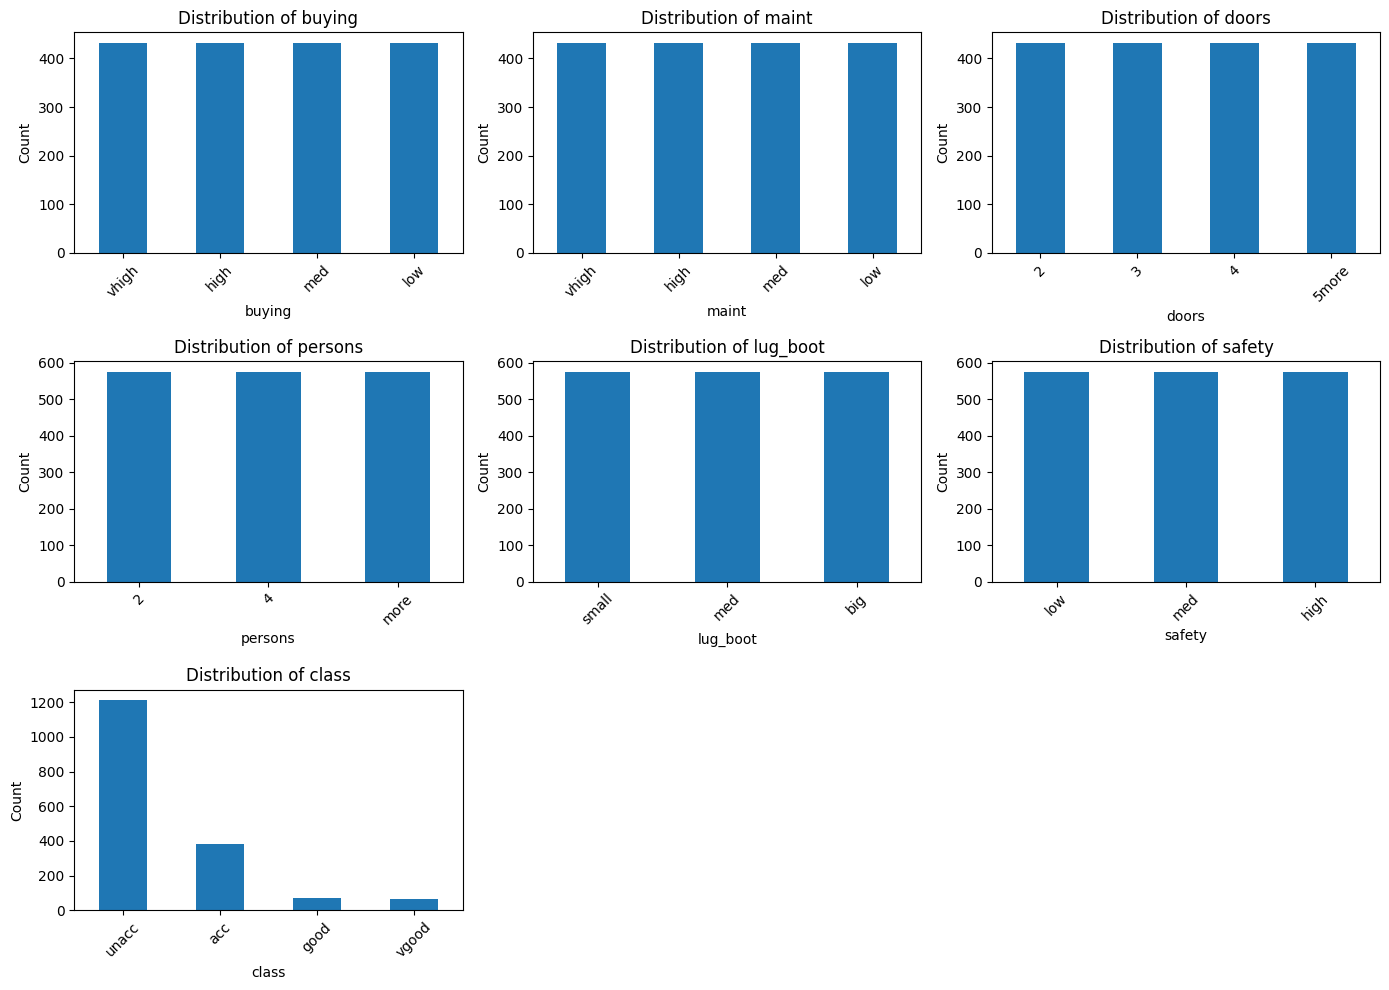

In [15]:
import matplotlib.pyplot as plt
cols = df.columns.tolist()
n = len(cols)
ncols = 3
nrows = (n + ncols - 1) // ncols
plt.figure(figsize=(14, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(nrows, ncols, i)
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()